# **1. Import Library**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score, confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# **2. Memuat Dataset dari Hasil Clustering**

In [80]:
url = 'https://raw.githubusercontent.com/DickySaragih/Submission_BMLP/refs/heads/main/Dataset_clustering.csv'
df = pd.read_csv(url)

In [81]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [71]:
print(X.head())
print(X.info())
print(X.describe())
print(y.value_counts())


       2020      2021      2022      2023
0  0.204064  0.218561  0.219695  0.207974
1  0.204135  0.218617  0.219718  0.208037
2  0.204310  0.218836  0.219974  0.208255
3  0.204526  0.218847  0.220121  0.208273
4  0.204093  0.218562  0.219696  0.207978
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71394 entries, 0 to 71393
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2020    71394 non-null  float64
 1   2021    71394 non-null  float64
 2   2022    71394 non-null  float64
 3   2023    71394 non-null  float64
dtypes: float64(4)
memory usage: 2.2 MB
None
               2020          2021          2022          2023
count  71394.000000  71394.000000  71394.000000  71394.000000
mean       0.204628      0.219168      0.220250      0.208466
std        0.007262      0.007437      0.007007      0.006798
min        0.059854      0.000000      0.041118      0.081912
25%        0.204064      0.218561      0.219695      0.207974
5

# **3. Data Splitting**

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**
1. K-Nearest Neighbors (KNN)
2. Decision Tree

In [73]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro') # Use f1_macro for multi-class
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)


knn_f1 = f1_score(y_test, y_pred_knn, average='macro') # Use macro for multi-class
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(f"KNN F1 Score: {knn_f1}")
print(f"KNN Confusion Matrix:\n{knn_cm}")

print("Best parameters for KNN:", grid_search_knn.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


KNN F1 Score: 0.9944288360283865
KNN Confusion Matrix:
[[21355     0     2]
 [    0     3     0]
 [    0     0    59]]
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [74]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1_macro')

grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

dt_f1 = f1_score(y_test, y_pred_dt, average='macro')
dt_cm = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree F1 Score: {dt_f1}")
print(f"Decision Tree Confusion Matrix:\n{dt_cm}")

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree F1 Score: 0.9886693496013029
Decision Tree Confusion Matrix:
[[21355     0     2]
 [    0     3     0]
 [    2     0    57]]
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1}


## **b. Evaluasi Model Klasifikasi**

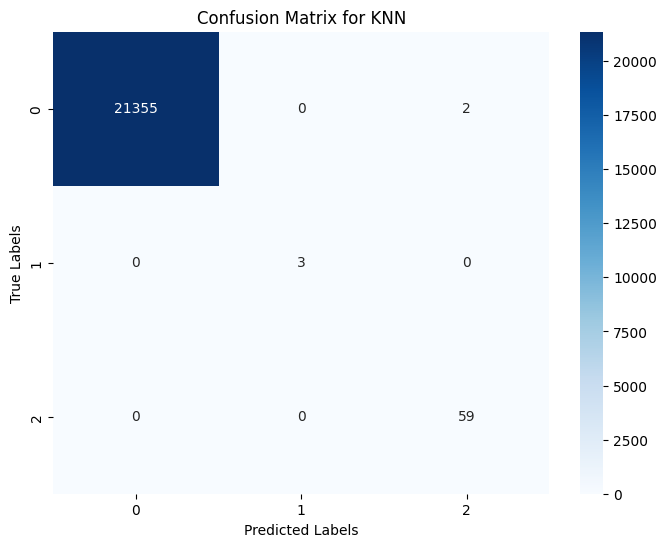

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




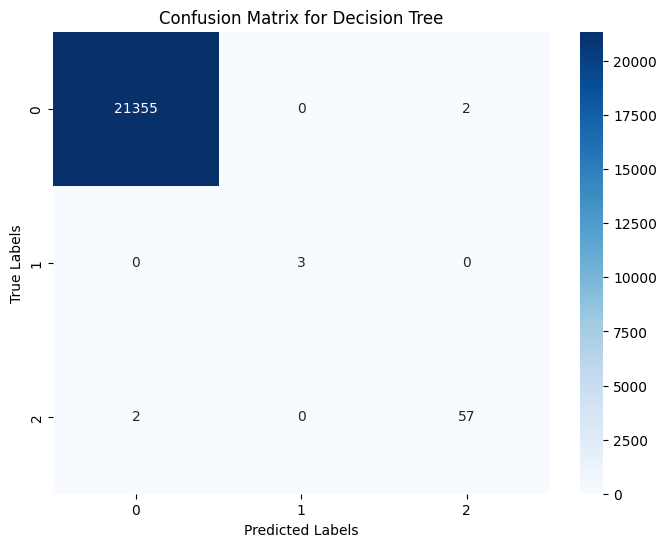

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

In [77]:
# RandomizedSearchCV for KNN
random_search_knn = RandomizedSearchCV(knn, param_grid_knn, n_iter=10, cv=5, scoring='f1_macro', random_state=42)
random_search_knn.fit(X_train, y_train)

best_random_knn = random_search_knn.best_estimator_
y_pred_random_knn = best_random_knn.predict(X_test)

random_knn_f1 = f1_score(y_test, y_pred_random_knn, average='macro')
random_knn_cm = confusion_matrix(y_test, y_pred_random_knn)

print(f"RandomizedSearchCV KNN F1 Score: {random_knn_f1}")
print(f"RandomizedSearchCV KNN Confusion Matrix:\n{random_knn_cm}")
print("Best parameters for RandomizedSearchCV KNN:", random_search_knn.best_params_)




/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV KNN F1 Score: 0.9944288360283865
RandomizedSearchCV KNN Confusion Matrix:
[[21355     0     2]
 [    0     3     0]
 [    0     0    59]]
Best parameters for RandomizedSearchCV KNN: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'euclidean'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV Decision Tree F1 Score: 0.9886693496013029
RandomizedSearchCV Decision Tree Confusion Matrix:
[[21355     0     2]
 [    0     3     0]
 [    2     0    57]]
Best parameters for RandomizedSearchCV Decision Tree: {'min_samples_leaf': 1, 'max_depth': 30}


In [78]:
# RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(dt, param_grid_dt, n_iter=10, cv=5, scoring='f1_macro', random_state=42)
random_search_dt.fit(X_train, y_train)

best_random_dt = random_search_dt.best_estimator_
y_pred_random_dt = best_random_dt.predict(X_test)

random_dt_f1 = f1_score(y_test, y_pred_random_dt, average='macro')
random_dt_cm = confusion_matrix(y_test, y_pred_random_dt)

print(f"RandomizedSearchCV Decision Tree F1 Score: {random_dt_f1}")
print(f"RandomizedSearchCV Decision Tree Confusion Matrix:\n{random_dt_cm}")
print("Best parameters for RandomizedSearchCV Decision Tree:", random_search_dt.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV Decision Tree F1 Score: 0.9886693496013029
RandomizedSearchCV Decision Tree Confusion Matrix:
[[21355     0     2]
 [    0     3     0]
 [    2     0    57]]
Best parameters for RandomizedSearchCV Decision Tree: {'min_samples_leaf': 1, 'max_depth': 30}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [79]:
# prompt: lakukan perbandingan pada proses data latih dan data uji untuk kedua model tersebut

print("KNN Performance on Training Data:")
y_pred_knn_train = best_knn.predict(X_train)
knn_train_f1 = f1_score(y_train, y_pred_knn_train, average='macro')
knn_train_cm = confusion_matrix(y_train, y_pred_knn_train)
print(f"KNN Training F1 Score: {knn_train_f1}")
print(f"KNN Training Confusion Matrix:\n{knn_train_cm}")

print("\nDecision Tree Performance on Training Data:")
y_pred_dt_train = best_dt.predict(X_train)
dt_train_f1 = f1_score(y_train, y_pred_dt_train, average='macro')
dt_train_cm = confusion_matrix(y_train, y_pred_dt_train)
print(f"Decision Tree Training F1 Score: {dt_train_f1}")
print(f"Decision Tree Training Confusion Matrix:\n{dt_train_cm}")

print("\nKNN Performance Comparison:")
print(f"Training F1 Score: {knn_train_f1:.4f}, Testing F1 Score: {knn_f1:.4f}")

print("\nDecision Tree Performance Comparison:")
print(f"Training F1 Score: {dt_train_f1:.4f}, Testing F1 Score: {dt_f1:.4f}")


KNN Performance on Training Data:
KNN Training F1 Score: 0.9985151757250798
KNN Training Confusion Matrix:
[[49858     0     0]
 [    0     4     0]
 [    1     0   112]]

Decision Tree Performance on Training Data:
Decision Tree Training F1 Score: 1.0
Decision Tree Training Confusion Matrix:
[[49858     0     0]
 [    0     4     0]
 [    0     0   113]]

KNN Performance Comparison:
Training F1 Score: 0.9985, Testing F1 Score: 0.9944

Decision Tree Performance Comparison:
Training F1 Score: 1.0000, Testing F1 Score: 0.9887


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Model KNN mencapai F1 Score 0.9944, menunjukkan performa yang lebih tinggi dibandingkan Decision Tree.
2. KNN memiliki performa lebih baik, tetapi Decision Tree lebih mudah diinterpretasi dan lebih efisien dalam beberapa kasus.
3. RandomizedSearchCV memberikan hasil yang sama untuk kedua model:
F1 Score KNN: 0.9944
F1 Score Decision Tree: 0.9887
4. Berdasarkan hasil evaluasi, baik KNN maupun Decision Tree menunjukkan F1-score tinggi pada data latih dan uji, dengan selisih yang sangat kecil. Ini mengindikasikan bahwa kedua model tidak mengalami overfitting maupun underfitting dan mampu menggeneralisasi dengan baik. KNN sedikit lebih unggul dalam performa berdasarkan F1-score.
5. Rekomendasi Perbaikan dan Kekurangan Pengujian Model
- Parameter Tuning: Perluas rentang parameter dalam GridSearchCV dan RandomizedSearchCV untuk menemukan hyperparameter optimal.

- Evaluasi Lebih Komprehensif: Gunakan metrik tambahan seperti akurasi, presisi, recall, AUC-ROC, serta lakukan cross-validation yang lebih robust.

- Penanganan Imbalance Data: Jika kelas tidak seimbang, gunakan SMOTE, undersampling, atau weighting untuk meningkatkan performa.

- Feature Engineering: Eksplorasi fitur baru, analisis korelasi, dan pertimbangkan PCA untuk mengurangi kompleksitas.

- Feature Scaling: Terapkan StandardScaler atau MinMaxScaler, terutama untuk KNN, karena sensitif terhadap skala fitur.
